# Gambler problem
In this notebook, we provide a VI and a PI implementation of the "gambler problem" that can bet 
$b\in\{1,\dots X\}$ and wins +b with probability $0.4$ and looses $-b$ with probability $0.6$. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

# Value Iteration

In [2]:
N = 101
p = 0.4
def VI():
    V = np.zeros(N)
    A = np.zeros(N)
    V[N-1]=1
    for t in range(1000):
        for i in range(1,N-1):
            Vi = np.array([(1-p)*V[i-a]+p*V[i+a] for a in range(1,min(N-i,i+1))])
            V[i] = max(Vi)
            A[i] = 1+np.argmax(Vi)
            #if t % 1000 == 10:
            #plt.plot(V)
    return V,A

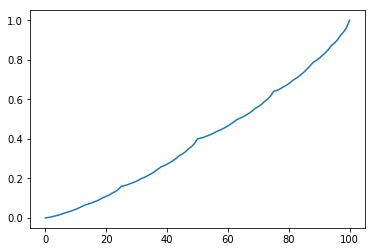

In [4]:
V_vi,A_vi = VI()
plt.plot(V_vi)
#plt.plot(A)

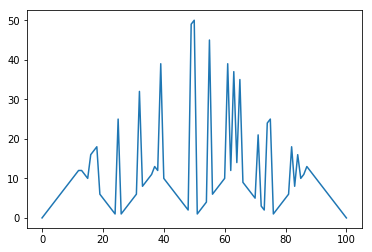

In [5]:
plt.plot(A_vi)

# Policy iteration

In [8]:
def pi_V(V):
    pi = np.zeros(N)
    for i in range(1,N-1):
        Vi = np.array([(1-p)*V[i-a]+p*V[i+a] for a in range(1,min(N-i,i+1))])
        pi[i] = 1+np.argmax(Vi)
    return pi
def P_pi(pi):
    P = np.zeros((N,N))
    for i in range(N-1):
        a = int(pi[i])
        P[i,i-a] = 1-p
        #if i+a<N-1:
        P[i,i+a] = p
    P[N-1,N-1] = 0.5
    return P
def C_pi(pi):
    C = np.zeros(N)
    #for i in range(N):
    #    a = pi[i]
    #    if i < N-1 and i+a == N-1:
    #        C[i] = p
    #C = np.zeros(N)
    C[N-1] = 0.5
    return C

delta = 1 #.999

def policyIteration(doPrint=False):
    V = np.random.rand(N)
    oldV = V
    for i in range(1000):
        pi = pi_V(V)
        C = C_pi(pi)
        V = np.tensordot(np.linalg.inv(np.eye(N)-delta*P_pi(pi)),C,1)
        if (doPrint): 
            print('Iteration:',i)
            print_valueFunction(V)
        deltaV = np.sum((V-oldV))
        print(deltaV)
        if abs(deltaV) <= 1e-10: break # not 0 because of floating point errors
        oldV = V
    print('number of iterations:',i)
    return V,pi
V,pi = policyIteration()

-24.087485709467202
10.085231126014504
0.6784735130246667
0.08052086429422711
0.02148333565932384
-1.0928757898653885e-16
number of iterations: 5


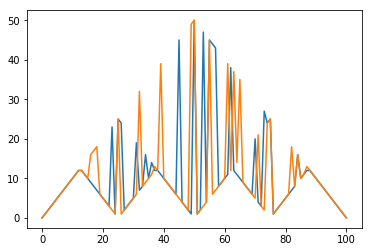

In [9]:
plt.plot(pi)
plt.plot(A_vi)
#plt.plot(pi_V(Vvi))

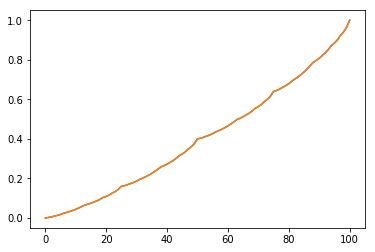

In [10]:
plt.plot(V_vi)
plt.plot(V)

# Performance of the "MAX" policy

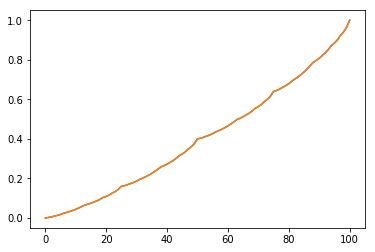

In [11]:
pi = np.zeros(N)
for i in range(N): pi[i] = min(i,N-i-1)
C = C_pi(pi)
myV = np.tensordot(np.linalg.inv(np.eye(N)-delta*P_pi(pi)),C,1)
plt.plot(myV)
plt.plot(V_vi)